# Projeto 1 - Ciência dos Dados

Nome: Isadora Stigliani Dalberto

**GitHub:** https://github.com/Doradalberto/APS_Isadora_Dalberto

**Base de Dados:** https://www.gapminder.org/data/documentation/gd004/ &
                   https://data.worldbank.org/indicator/NY.GDP.MKTP.KD

## Pergunta(s):

Os países que entraram no SADC (Comunidade para o Desenvolvimento da África Austral) em 1992 tiveram um aumento no seu PIB superior aos países da África que não entraram? Além do PIB, a expectativa de vida também aumentou proporcionalmente ao PIB?

**Anos de interesse:**

>de 1971 até 1991 - 20 anos antes de existir o SADC
 
>de 1992 até 2010 - 20 anos após o SADC existir

## Hipótese:

Os países que entraram na SADC tiveram seu PIB mais elevado do que os países da África que não pertencem ao grupo pois, por ser uma organização que tem como objetivo estimular o comércio de produtos e serviços entre os países membros, há uma maior exportação e melhoria na economia do grupo como um todo. Quanto a expectativa de vida, é esperado que a mesma também aumente com o passar dos anos, já que a organização visa diminuir a pobreza da população de todos os países membros e melhorar a qualidade de vida, acarretando no aumento da Expectativa de Vida.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

**Formatação para deixar os gráficos grandes**

In [2]:
plt.rcParams["figure.figsize"] = [16,9]
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["ytick.labelsize"] = 15
plt.rcParams["axes.labelsize"] = 17
plt.rcParams["lines.markersize"] = 15

**Lê os arquivos que vamos utilizar no projeto:**

In [3]:
dados = pd.read_excel('total_gdp_us_inflation_adjusted.xlsx')

In [4]:
vida = pd.read_excel('life_expectancy_years.xlsx')

**Altera o índice das tabelas:**

In [5]:
dados_indice = dados.set_index("country")
vida_indice = vida.set_index("country")

**Países pertencentes ao Bloco SADC (áfrica austral):**

In [6]:
af_aus = ["Angola", "South Africa", "Botswana", "Congo, Dem. Rep.", "Lesotho", "Madagascar", "Malawi", "Mauritius", "Mozambique", "Namibia", "Swaziland", "Tanzania", "Zambia", "Zimbabwe"]

**Paises da áfrica que não pertencem ao Bloco SADC:**

In [7]:
af_nao_aus = ["Benin", "Burkina Faso", "Burundi", "Cameroon", "Cape Verde", "Central African Republic", "Chad", "Congo, Rep.", "Djibouti", "Eritrea", "Ethiopia", "Gabon", "Gambia", "Ghana", "Guinea", "Guinea-Bissau", "Liberia", "Mali", "Niger", "Nigeria", "Rwanda", "Senegal", "Seychelles", "Sierra Leone", "Sudan", "Togo", "Uganda" ]

**Listas de Anos**

In [8]:
anos = [1971, 1972,1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]
anos_1 = [1971, 1972,1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991]
anos_2 = [1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]

**Criação da Coluna AF_AUS e AF_NAO_AUS**

In [9]:
dados_indice.loc[:, "AF_AUS"] = 0      #criar uma coluna chamada AF_AUS e falar que todos os países são 0
dados_indice.loc[af_aus,"AF_AUS"]=1    #falar que todos os países da lista af_aus recebem o valor de 1 na coluna AF_AUS

dados_indice.loc[:, "AF_NAO_AUS"] = 0     #criar uma coluna chamada AF_NAO_AUS e falar que todos os países são 0
dados_indice.loc[af_nao_aus,"AF_NAO_AUS"]=1   #falar que todos os países da lista af_nao_aus recebem o valor de 1 na coluna AF_NAO_AUS

vida_indice.loc[:, "AF_AUS"] = 0
vida_indice.loc[af_aus,"AF_AUS"]=1

vida_indice.loc[:, "AF_NAO_AUS"] = 0
vida_indice.loc[af_nao_aus,"AF_NAO_AUS"]=1

**Loc selecionando os países**

In [10]:
dados_af_aus = dados_indice.loc[af_aus]     #PIB de todos os paises que sao do SADC

dados_af_nao_aus = dados_indice.loc[af_nao_aus]     #PIB de todos os paises que sao da africa mas nao sao da SADC

vida_af_aus = vida_indice.loc[af_aus]     #ExpVida de todos os paises que sao do SADC

vida_af_nao_aus = vida_indice.loc[af_nao_aus]     #ExpVida de todos os paises que sao da africa mas nao sao da SADC

africa = af_aus + af_nao_aus     #definição do que é africa = soma das duas listas

dados_africa = dados_indice.loc[africa]     #PIB de todos os paises da áfrica

vida_africa = vida_indice.loc[africa]     #ExpVida de todos os paises da áfrica

**Retirando as duas ultimas colunas (AF_AUS e AF_NAO_AUS) + Seleção de Ano**

In [11]:
transpor_aus = dados_af_aus.transpose()
transpor_quant_aus = transpor_aus[:-2]

aus_anos1 = transpor_quant_aus.loc[(transpor_quant_aus.index>1970) & (transpor_quant_aus.index<1992),:].transpose()
soma_aus_anos1 = aus_anos1.sum() #soma POR ANO

aus_anos2 = transpor_quant_aus.loc[(transpor_quant_aus.index>1991) & (transpor_quant_aus.index<2013),:].transpose()
soma_aus_anos2 = aus_anos2.sum() #soma POR ANO

aus_anos_total = transpor_quant_aus.loc[(transpor_quant_aus.index>1970) & (transpor_quant_aus.index<2013),:].transpose()
soma_aus_anos_total = aus_anos_total.sum()

In [12]:
transpor_nao_aus = dados_af_nao_aus.transpose()
transpor_quant_nao_aus = transpor_nao_aus[:-2]

nao_aus_anos1 = transpor_quant_nao_aus.loc[(transpor_quant_nao_aus.index>1970) & (transpor_quant_nao_aus.index<1992),:].transpose()
soma_nao_aus_anos1 = nao_aus_anos1.sum()

nao_aus_anos2 = transpor_quant_nao_aus.loc[(transpor_quant_nao_aus.index>1991) & (transpor_quant_nao_aus.index<2013),:].transpose()
soma_nao_aus_anos2 = nao_aus_anos2.sum()

nao_aus_anos_total = transpor_quant_nao_aus.loc[(transpor_quant_nao_aus.index>1970) & (transpor_quant_nao_aus.index<2013),:].transpose()
soma_nao_aus_anos_total = nao_aus_anos_total.sum()

In [13]:
transpor = dados_africa.transpose()
transpor_quant = transpor[:-2]

africa_anos1 = transpor_quant.loc[(transpor_quant.index>1970) & (transpor_quant.index<1992),:].transpose()
soma_africa_anos1 = africa_anos1.sum()

africa_anos2 = transpor_quant.loc[(transpor_quant.index>1991) & (transpor_quant.index<2013),:].transpose()
soma_africa_anos2 = africa_anos2.sum()

africa_anos_total = transpor_quant.loc[(transpor_quant.index>1970) & (transpor_quant.index<2013),:].transpose()
soma_africa_anos_total = africa_anos_total.sum()

**Colocando denovo as colunas AF_AUS e AF_NAO_AUS**

In [14]:
africa_anos_total.loc[:, "AF_AUS"] = 0
africa_anos_total.loc[af_aus,"AF_AUS"]=1

africa_anos_total.loc[:, "AF_NAO_AUS"] = 0
africa_anos_total.loc[af_nao_aus,"AF_NAO_AUS"]=1

#africa_anos_total  #Imprime todos os paises da África no período de tempo selecionado e indica quais
#                   sao da SADC e quais não são

**Gráfico do PIB x Tempo em todo o período de tempo estudado**

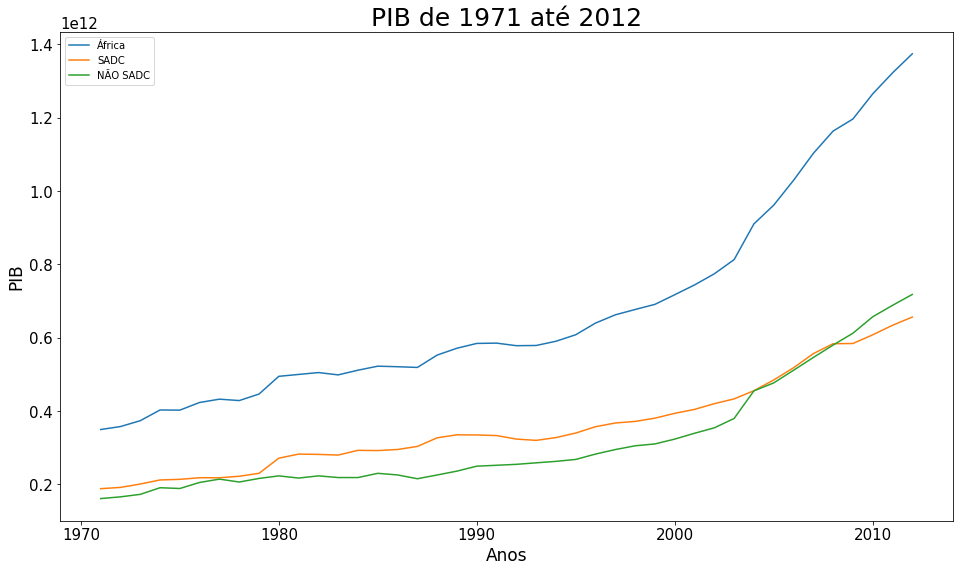

In [15]:
plt.plot(anos, soma_africa_anos_total, label="África")
plt.plot(anos, soma_aus_anos_total, label="SADC")
plt.plot(anos, soma_nao_aus_anos_total, label="NÃO SADC")
plt.xlabel("Anos")
plt.ylabel("PIB")
plt.title("PIB de 1971 até 2012")
plt.legend()
plt.show()

**Gráfico PIB Médio em todo período de tempo estudado**

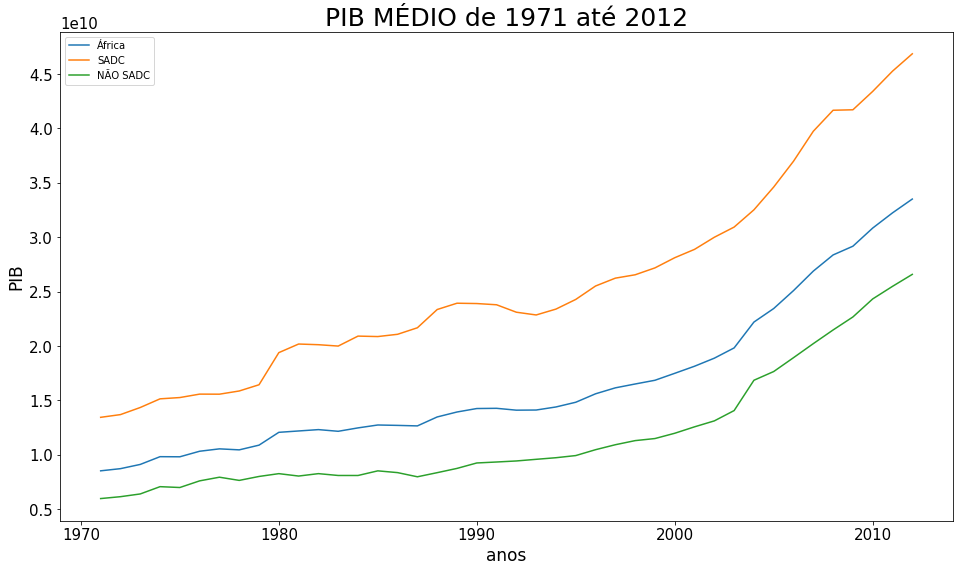

In [16]:
plt.plot(anos, soma_africa_anos_total/41, label="África")
plt.plot(anos, soma_aus_anos_total/14, label="SADC" )
plt.plot(anos, soma_nao_aus_anos_total/27, label="NÃO SADC")
plt.xlabel("anos")
plt.ylabel("PIB")
plt.title("PIB MÉDIO de 1971 até 2012")
plt.legend()
plt.show()
#em valores absolutos a SADC é superior, todavia, quando se trata de aumentos percentuais, os países que não fazem parte do grupo tiveram u aumento superior

>> **Análise do Gráfico:** Como é percebido, os países pertencentes ao SADC possuem um PIB por país superior aos outros países da África, o que indica que, mesmo antes da criação do grupo, os países já faziam parte da porcentagem com maior pib da áfrica.

**Retirada dos NaN**

In [17]:
dados_af_nao_aus_retirada = dados_af_nao_aus.dropna()
dados_af_aus_retirada = dados_af_aus.dropna()
vida_af_nao_aus_retirada = vida_af_nao_aus.dropna()
vida_af_aus_retirada = vida_af_nao_aus.dropna()

In [21]:

comp_2010_af_nao_aus = pd.concat([af_nao_aus_2010, vida_af_nao_aus_2010], axis=1, sort=True)

comp_1972_af_nao_aus = pd.concat([af_nao_aus_1972, vida_af_nao_aus_1972], axis=1, sort=True)

comp_2010_af_aus = pd.concat([af_aus_2010, vida_af_aus_2010], axis=1, sort=True) #dropna buga
comp_1972_af_aus = pd.concat([af_aus_1972, vida_af_aus_1972], axis=1, sort=True) ########### dropna buga

comp_1972_all = pd.concat([comp_1972_af_aus, comp_1972_af_nao_aus], axis=1, sort=True) ## dropna buga
comp_2010_all = pd.concat([comp_2010_af_aus, comp_2010_af_nao_aus], axis=1, sort=True) #3 colunas

pib_af_aus = pd.concat([af_aus_1972, af_aus_2010], axis=1, sort=True)
pib_af_nao_aus = pd.concat([af_nao_aus_1972, af_nao_aus_2010], axis=1, sort=True)

vida_af_aus = pd.concat([vida_af_aus_1972, vida_af_aus_2010], axis=1, sort=True)
vida_af_nao_aus = pd.concat([vida_af_nao_aus_1972, vida_af_nao_aus_2010], axis=1, sort=True)

comp_2010_af_aus
af_aus_2010

country
South Africa        375000000000
Botswana             12800000000
Congo, Dem. Rep.     21600000000
Lesotho               2390000000
Madagascar            8730000000
Malawi                6960000000
Zambia               20300000000
Zimbabwe             10100000000
Name: PIB 2010, dtype: int64

In [22]:
print("PIB médio nos paises pertencentes a SADC:")
pib_medio_af_aus = pib_af_aus.sum()/len(pib_af_aus)
print(pib_medio_af_aus)
print()
print("Aumento percentual do PIB médio entre os países pertencentes a SADC:")
aumento_pib_af_aus = (pib_medio_af_aus[1] * 100 )/(pib_medio_af_aus[0]) - 100
print("{0} %".format(aumento_pib_af_aus))

#pib_medio[0] -- PIB 1971
#pib_medio[1] -- PIB 2010

PIB médio nos paises pertencentes a SADC:
PIB 1972    2.388250e+10
PIB 2010    5.723500e+10
dtype: float64

Aumento percentual do PIB médio entre os países pertencentes a SADC:
139.65246519417983 %


In [23]:
print("PIB médio nos paises não pertencentes a SADC:")
pib_medio_af_nao_aus = pib_af_nao_aus.sum()/len(pib_af_nao_aus) 
print(pib_medio_af_nao_aus)
print()
print("Aumento percentual do PIB médio entre os países não pertencentes a SADC:")
aumento_pib_af_nao_aus = (pib_medio_af_nao_aus[1] * 100)/(pib_medio_af_nao_aus[0]) -100
print("{0} %".format(aumento_pib_af_nao_aus))

#pib_medio[0] -- PIB 1971
#pib_medio[1] -- PIB 2010

PIB médio nos paises não pertencentes a SADC:
PIB 1972    9.057944e+09
PIB 2010    3.235389e+10
dtype: float64

Aumento percentual do PIB médio entre os países não pertencentes a SADC:
257.18798108474454 %


In [24]:
print("Expectativa de vida média nos países pertencentes a SADC:")
vida_media_af_aus = vida_af_aus.sum()/len(vida_af_aus)
print(vida_media_af_aus)
print()
print("Aumento percentual da Expectativa de Vida média nos paises pertencentes a SADC:")
aumento_vida_af_aus = (vida_media_af_aus[1] * 100)/(vida_media_af_aus[0]) -100
print("{0} %".format(aumento_vida_af_aus))

Expectativa de vida média nos países pertencentes a SADC:
ExpVida 1972    48.925926
ExpVida 2010    60.774074
dtype: float64

Aumento percentual da Expectativa de Vida média nos paises pertencentes a SADC:
24.21650264950793 %


In [25]:
print("Expectativa de vida média nos países não pertencentes a SADC:")
vida_media_af_nao_aus = vida_af_nao_aus.sum()/len(vida_af_nao_aus)
print(vida_media_af_nao_aus)
print()
print("Aumento percentual da Expectativa de Vida média nos paises não pertencentes a SADC:")
aumento_vida_af_nao_aus = (vida_media_af_nao_aus[1] * 100)/(vida_media_af_nao_aus[0]) -100
print("{0} %".format(aumento_vida_af_nao_aus))

Expectativa de vida média nos países não pertencentes a SADC:
ExpVida 1972    48.925926
ExpVida 2010    60.774074
dtype: float64

Aumento percentual da Expectativa de Vida média nos paises não pertencentes a SADC:
24.21650264950793 %


**Gráfico Expectativa de Vida x PIB 1990**

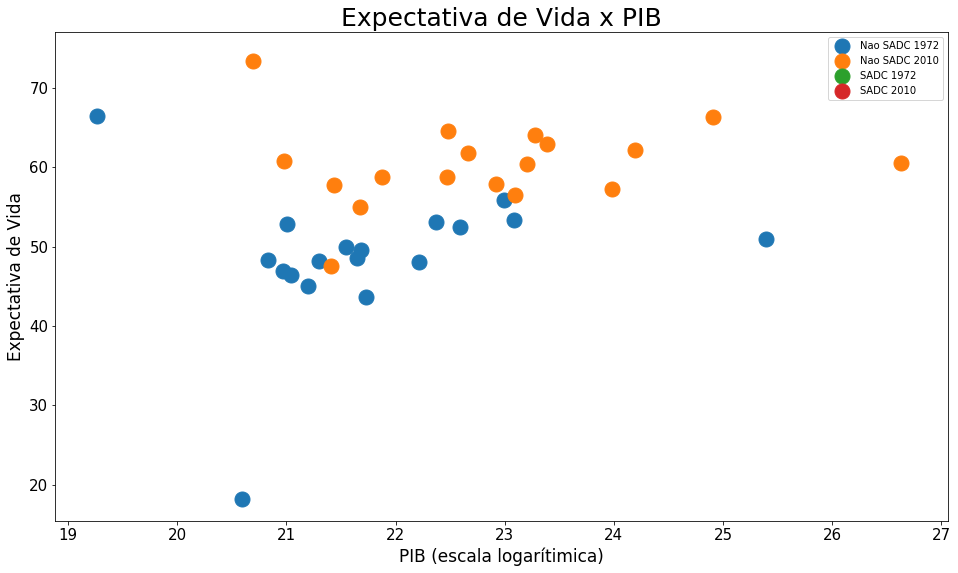

In [26]:
plt.scatter(np.log(comp_1972_af_nao_aus["PIB 1972"]),comp_1972_af_nao_aus["ExpVida 1972"], label="Nao SADC 1972")
plt.scatter(np.log(comp_2010_af_nao_aus["PIB 2010"]), comp_2010_af_nao_aus["ExpVida 2010"], label="Nao SADC 2010")
plt.scatter(np.log(comp_1972_af_aus["PIB 1972"]),comp_1972_af_aus["ExpVida 1972"], label="SADC 1972")
plt.scatter(np.log(comp_2010_af_aus["PIB 2010"]), comp_2010_af_aus["ExpVida 2010"], label="SADC 2010")
plt.title("Expectativa de Vida x PIB")
plt.xlabel("PIB (escala logarítimica)")
plt.ylabel("Expectativa de Vida")
plt.legend()
plt.show()

**Gráfico Disperção com reta da média**

In [28]:
def reta(dados_x, dados_y, c, cor, texto):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()

    print()
    print(texto)
    print(cor)
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
    
    plt.scatter(dados_x, dados_y, c=c, alpha=0.8)
    plt.title('1972')
    plt.xlabel('PIB')
    plt.ylabel('Expectativa de Vida')
    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color=c)
    plt.tight_layout()

    
af_nao_aus_1972_2 = dados_af_nao_aus[1972]
vida_af_nao_aus_1972_2 = vida_af_nao_aus[1972]

af_aus_1972_2 = dados_af_aus[1972]
vida_af_aus_1972_2 = vida_af_aus[1972]

af_nao_aus_2010_2 = dados_af_nao_aus[2010]
vida_af_nao_aus_2010_2 = vida_af_nao_aus[2010]

af_aus_2010_2 = dados_af_aus[2010]
vida_af_aus_2010_2 = vida_af_aus[2010]


plt.scatter((np.log(af_nao_aus_1972_2)), vida_af_nao_aus_1972_2, label="Não SADC 1972")
reta((np.log(af_nao_aus_1972_2)), vida_af_nao_aus_1972_2, "blue", "cor: Azul", "Paises não participantes da SADC - 1972")

plt.scatter((np.log(af_aus_1972_2)), vida_af_aus_1972_2, label="SADC 1972")
reta((np.log(af_aus_1972_2)), vida_af_aus_1972_2, "red", "cor: Vermelha", "Paises participantes da SADC - 1972")

plt.scatter((np.log(af_nao_aus_2010_2)), vida_af_nao_aus_2010_2, label="Não SADC 2010")
reta((np.log(af_nao_aus_2010_2)), vida_af_nao_aus_2010_2, "green", "cor: Verde", "Paises não participantes da SADC - 2010")

plt.scatter((np.log(af_aus_2010_2)), vida_af_aus_2010_2, label="Não SADC 2010")
reta((np.log(af_aus_2010_2)), vida_af_aus_2010_2, "yellow", "cor: Amarelo", "Paises participantes da SADC - 2010")


plt.xlabel("PIB (Escala logarítimica)")
plt.ylabel("Expectativa de vida")
plt.title("Dispersão ")
plt.show()

KeyError: 1972

In [20]:
af_aus_1972 = dados_af_aus_retirada[1972]
af_nao_aus_1972 = dados_af_nao_aus_retirada[1972]
af_aus_2010 = dados_af_aus_retirada[2010]
af_nao_aus_2010 = dados_af_nao_aus_retirada[2010]
vida_af_aus_2010 = vida_af_aus_retirada[2010]
vida_af_nao_aus_2010 = vida_af_nao_aus_retirada[2010]
vida_af_aus_1972 = vida_af_aus_retirada[1972]
vida_af_nao_aus_1972 = vida_af_nao_aus_retirada[1972]

af_aus_1972.rename("PIB 1972", inplace=True)
af_nao_aus_1972.rename("PIB 1972", inplace=True)
af_aus_2010.rename("PIB 2010", inplace=True)
af_nao_aus_2010.rename("PIB 2010", inplace=True)
vida_af_aus_2010.rename("ExpVida 2010", inplace=True)
vida_af_nao_aus_2010.rename("ExpVida 2010", inplace=True)
vida_af_aus_1972.rename("ExpVida 1972", inplace=True)
vida_af_nao_aus_1972.rename("ExpVida 1972", inplace=True)



country
Benin                       48.2
Burkina Faso                45.0
Burundi                     18.2
Cameroon                    52.5
Cape Verde                  58.9
Central African Republic    48.3
Chad                        49.9
Congo, Rep.                 49.6
Djibouti                    60.3
Eritrea                     46.0
Ethiopia                    44.0
Gabon                       53.1
Gambia                      55.8
Ghana                       55.9
Guinea                      45.4
Guinea-Bissau               41.3
Liberia                     48.5
Mali                        40.6
Niger                       43.7
Nigeria                     51.0
Rwanda                      46.9
Senegal                     48.1
Seychelles                  66.4
Sierra Leone                46.4
Sudan                       53.4
Togo                        52.8
Uganda                      50.8
Name: ExpVida 1972, dtype: float64

In [ ]:
af_aus_1972 = dados_af_aus_retirada[1990]
af_aus_1972_sem_africa_sul = af_aus_1972.drop(labels = ['South Africa']) 
sem_africa = aus_anos_total.drop(labels=["South Africa"])

In [ ]:
aus_anos_total_t = aus_anos_total.T
medias_aus_anos_total_t = aus_anos_total.mean()
for pais in aus_anos_total_t.columns:
    plt.scatter(x=aus_anos_total_t.index, y=(np.log(aus_anos_total_t[pais])))
    
ax = plt.subplot(111)

plt.plot(medias_aus_anos_total_t.index, (np.log(medias_aus_anos_total_t)), color="black")
plt.xlabel("Anos")
plt.ylabel("PIB (US$)  (em escala logarítmica)")
plt.title("PIB x Anos")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
aus_anos_total_t = aus_anos_total.T
medias_aus_anos_total_t = aus_anos_total.mean()
for pais in aus_anos_total_t.columns:
    plt.scatter(x=aus_anos_total_t.index, y=aus_anos_total_t[pais]/1000000)
    
ax = plt.subplot(111)

plt.plot(medias_aus_anos_total_t.index, medias_aus_anos_total_t/1000000, color="b")
plt.xlabel("Anos")
plt.ylabel("PIB (US$)")
plt.title("PIB x Anos - SADC")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
sem_nigeria = nao_aus_anos_total.drop(labels=[])
nao_aus_anos_total_t = sem_nigeria.T
medias_nao_aus_anos_total_t = sem_nigeria.mean()
for pais in nao_aus_anos_total_t.columns:
    plt.scatter(x=nao_aus_anos_total_t.index, y=(np.log(nao_aus_anos_total_t[pais])))
    
ax = plt.subplot(111)

plt.plot(medias_nao_aus_anos_total_t.index, np.log(medias_nao_aus_anos_total_t), color="black")
plt.xlabel("Anos")
plt.ylabel("PIB (US$)")
plt.title("PIB x Anos - Não SADC")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.plot()

## Conclusão

Responda à pergunta, argumento da melhor forma possível com base nos dados

> A ser respondida de acordo com a progressão do projeto!